In [27]:
from numpy import *
from matplotlib.pyplot import *

In [41]:
def control(x, k, xd):
    return k * (xd - x)

def simulate(Δt, x, u):
    x += Δt * u  #Euler integration
    return x

def sense(x):
#   A perfect sensor where y(t) = p(t)
    return x

# Simulator for 2d line trajectory:
def run_2d():

    tf = 1 #final time
    Δt = 0.01 #time step
    time = linspace(0, tf, int(tf / Δt) + 1) #time interval

    x = array([4.,5.])  #initial position
    x_log = [copy(x)]

    xd = array([2.,10.]) #desired end position
    k = 100  #chosen k value

    for t in time:
        y = sense(x)
        u = control(x,k,xd)
        x = simulate(Δt, x, u)  #simulate by integration
        x_log.append(copy(x))

    x_log = array(x_log)
    return x_log
                 
def plot_2d(x_log):
    grid()
    plot(x_log[:,0], x_log[:,1])

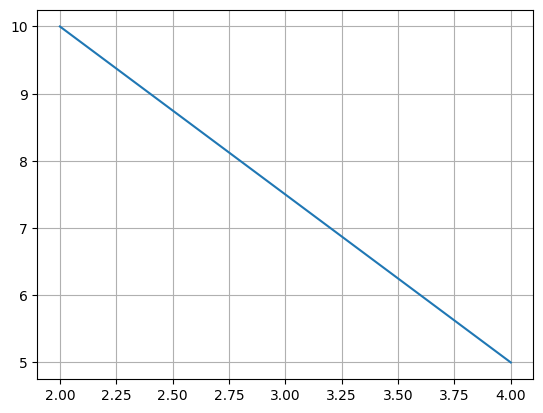

In [32]:
x_log = run_2d()
plot_2d(x_log)

In [89]:
def plot_error(k):
    tf = 1 #final time
    Δt = 0.001 #time step
    time = linspace(0, tf, int(tf / Δt) + 1) #time interval
    
    xd = array([2.,10.]) #desired end position
    
    x = array([4.,5.])  #initial position
    x_log = [copy(x)]

    for t in time:
        y = sense(x)
        u = control(x,k,xd)
        x = simulate(Δt, x, u)  #simulate by integration
        x_log.append(copy(x))

    x_log = array(x_log)
    
    grid()
    
    time = linspace(0, tf, int(tf / Δt) + 1) #time interval
    time = np.append(time, float(time[-1]) + Δt)
    
    error = array([abs(xd - x) for x in x_log])
    
    plot(time, error[:,0], label='x error')
    plot(time, error[:,1], label='y error')
    legend()
    title('Time vs. Error, K = ' + str(k))
    

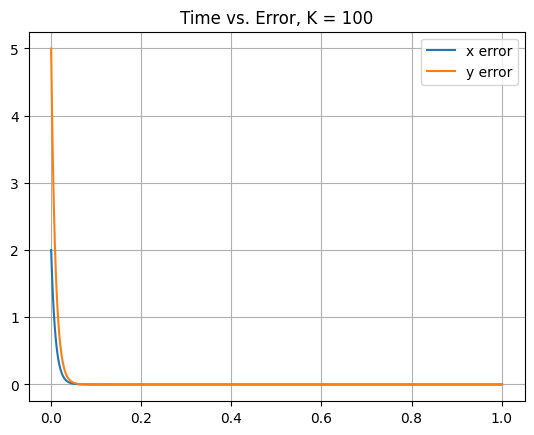

In [90]:
plot_error(100)

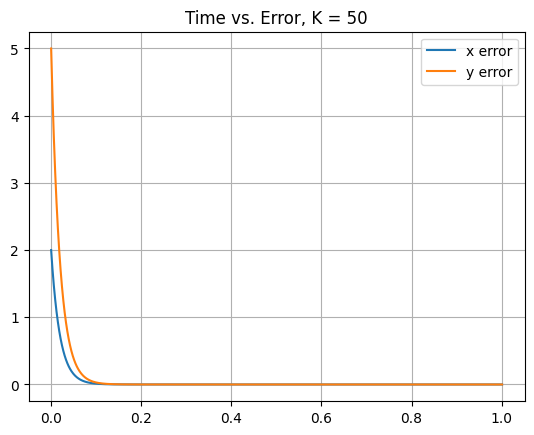

In [91]:
plot_error(50)

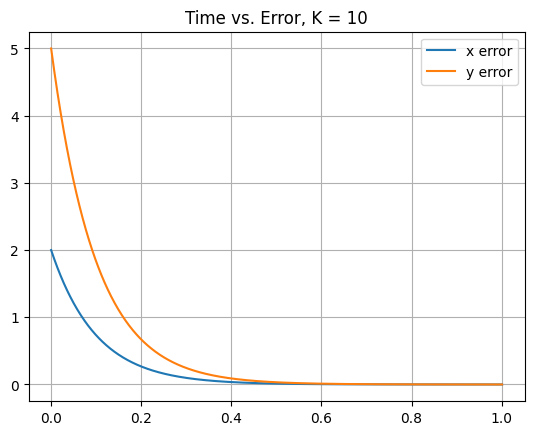

In [92]:
plot_error(10)